<div style="border:solid Chocolate 2px; padding: 40px">

<b>Привет!</b>

Меня зовут Дмитрий Михаленко, я буду ревьюером твоего проекта. Если ты не против, то предлагаю построить наше общение на "ты" ;) Если удобнее на "вы", то нет проблем, только скажи об этом. 

Ниже в работе ты найдешь мои комментарии - **пожалуйста, не перемещай, не изменяй и не удаляй их**.
    
Для наглядности я буду использовать цветовую разметку:
<font color='green'>зеленого</font>, <font color='gold'>желтого</font> и <font color='red'>красного</font> цветов. Сейчас объясню, что они значат:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Решение на этом шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Решение на этом шаге может стать еще лучше, если внести небольшие коррективы.
Но настаивать я не буду.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
Для правильного решения задачи на этом шаге необходимо внести правки. Напоминаю, что проект не может быть принят, без их отработки.
</div>

Для продуктивной работы прошу: **если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом**
Мне будет легче отследить изменения, если ты тоже выделишь свои комментарии:
    
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
        
Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.

# Определение возраста покупателей

Цель проекта — построить модель, которая сможет определять возраст человека по фотографии его лица. Такая модель поможет супермаркету «Хлеб-Соль» анализировать поведение покупателей разных возрастных групп и контролировать продажу товаров с возрастными ограничениями (например, алкоголя). Для обучения используются реальные фотографии и соответствующие им значения возраста. Модель будет оцениваться по метрике MAE (средняя абсолютная ошибка).

**Ход исследования:**

- Проведем исследовательский анализ набора фотографий.
- Подготовим данные к обучению.
- Обучим нейронную сеть и рассчитаем её качество.


<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>  Мария, очень здорово, что начинаешь свой проект с представления вводной части. Ты ясно и четко формулируешь цель нашего исследования, что дает нам прочную основу для дальнейших этапов. Так держать!

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array


<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>  Согласен, всегда собираем и структурируем все пипы, импорты и константы в начале тетрадки, это позволяет легче ориентироваться и добавлять новые по необходимости! Кстати, все основные моменты, касающиеся РЕР8, всегда можно освежить в памяти [здесь](https://pyplanet.ru/article/pep-0008.html)
    

## Исследовательский анализ данных

In [3]:
data = pd.read_csv('/datasets/faces/labels.csv')

print(data.head())
print(data.info())
print(f"Количество изображений: {data.shape[0]}")


    file_name  real_age
0  000000.jpg         4
1  000001.jpg        18
2  000002.jpg        80
3  000003.jpg        50
4  000004.jpg        17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB
None
Количество изображений: 7591


В датасете содержится 7591 изображение, 2 столбца(file_name, real_age). Стобец file_name содержит тип данных object, столбец real_age - int64. Пропусков в данных нет — это хорошо для начала обучения.


<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>  Датасет подгружен, первичный обзор данных осуществлен, молодец

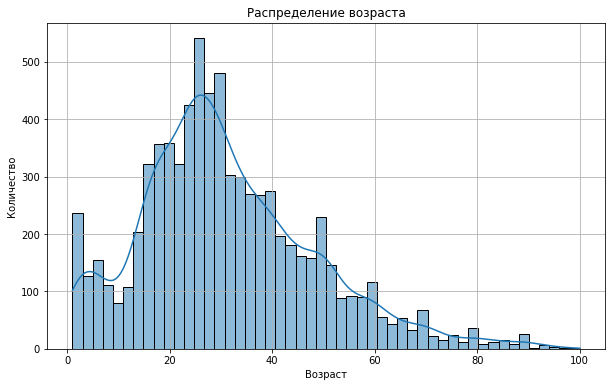

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(data['real_age'], bins=50, kde=True)
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.grid(True)
plt.show()


Возраст варьируется от 0 до 100 лет, но распределение неравномерное. Наибольшее количество примеров приходится на диапазон примерно от 23 до 35 лет — это пик на графике. Есть много данных у молодых людей (до 40 лет), но существенно меньше — среди пожилых (60+). Наблюдаются единичные выбросы.


<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Мария, график распределения таргета ты представила наглядно и в соответствии с требованиями. Как рекомендация, здесь можно использовать значение bins=100, т.к. мы исследуем потенциально 100 уникальных возрастов. При более детальном рассмотрении становятся гораздо заметнее дополнительные особенности нашей выборки, например явные пики на возрастах, кратных 10 (т.е. вероятно, зачастую возраст определялся "на глаз"), о чем также неплохо было бы упомянуть в выводах. 

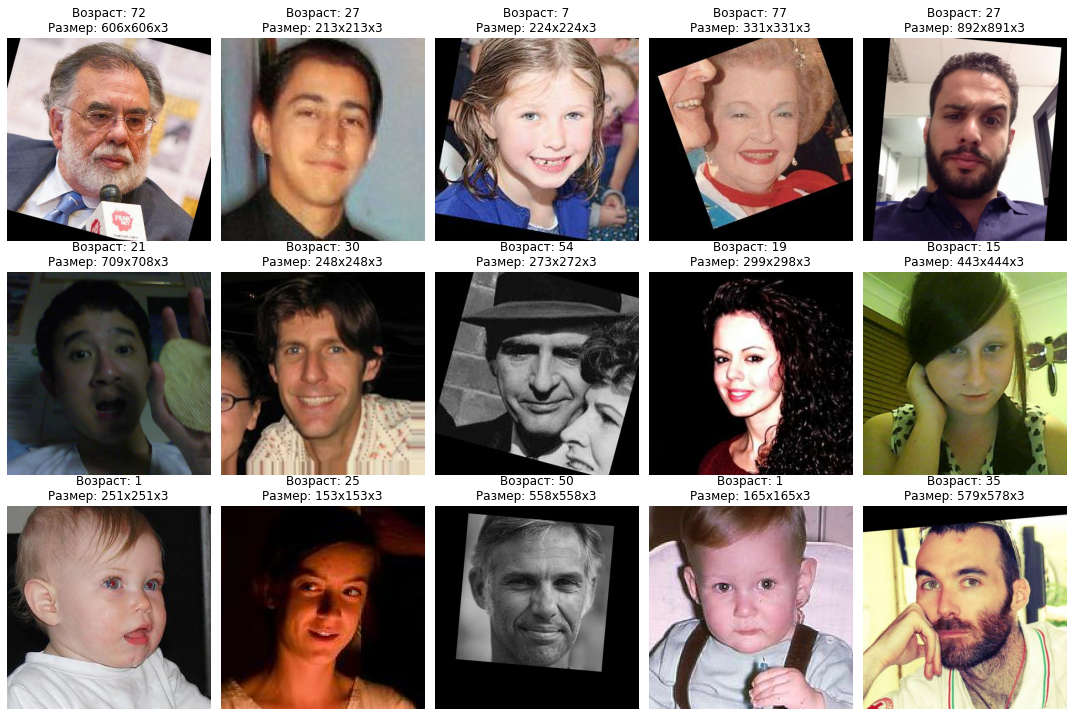

In [10]:
plt.figure(figsize=(15, 10))
for i, row in enumerate(sample.itertuples()):
    img_path = os.path.join(image, row.file_name)
    img = load_img(img_path)  
    img_array = img_to_array(img)
    
    height, width, channels = img_array.shape  
    
    plt.subplot(3, 5, i + 1)
    plt.imshow(img)
    plt.title(f"Возраст: {row.real_age}\nРазмер: {width}x{height}x{channels}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Датасет содержит визуально разнообразные, но пригодные для обучения изображения. Изображения имеют три цветовых канала RGB, квадратную форму и разные размеры. Дополнительная обработка фотографий не требуется, тк лица расположены в центре и занимают большую часть изображения. Визуально возраст соответствует действительности

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>  Мария, вывод некоторых фотографий из датасета осуществлен и очень здорово, что подписываешь фотографии их целевой переменной, так сразу можно оценить адекватность разметки. Также круто, что провела краткий анализ изображений, входящих в датасет

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Все достигнутые результаты и выявленные особенности предложил бы структурировать в выводе по разделу

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

Для обучения модели:

- Нужно привести все изображения к единому размеру (например, 150x150).
- Потенциально полезно будет использовать предобученные сверточные сети  для transfer learning. Используем ResNet50, замораживать не нужно — веса будут дообучаться, тк у нас большой датасет


Прочитаем данные из csv-файла labels.csv в датафрейм, который будет одним из параметров метода ImageDataGenerator —flow_from_dataframe(dataframe, directory, ...).

Также нужно учитывать следующие условия:

- Значения MAE на тестовой выборке не больше 8.

Перед нами задача регрессии(предсказание-возраст человека). Для задачи нужен один нейрон, который вернёт число-предсказание. В конце сети нужна активация ReLU, тк положительные прогнозы сети функция ReLU не меняет, а все отрицательные — приводит к нулю. Чисел меньше 0 быть не может.

```python

# < скопируйте код сюда >
def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    
    train_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1./255
    )

    train_generator = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(150, 150),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345
    )

    return train_generator

def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')

    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)

    val_generator = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(150, 150),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=42
    )
    
    return val_generator

def create_model(input_shape):
    backbone = ResNet50(input_shape=(150, 150, 3),
                    weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                    include_top=False)
    

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error',
                  metrics=['mae'])

    return model

def train_model(model, train_data, test_data, batch_size=None,  epochs=5,
                steps_per_epoch=None, validation_steps=None):
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
        
    model.fit(
        train_data,
        validation_data=test_data,
        epochs=epochs,
        batch_size=batch_size,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        verbose=2
    )
    return model
    
    
if __name__ == "__main__":
    path = '/datasets/faces/'
    train_data = load_train(path)
    val_data = load_test(path)
    model = create_model((150, 150, 3))
    model = train_model(model, train_data, val_data, epochs=5)
    

```

```

# < скопируйте результат вывода на экран сюда >
# < длинные строки со скачиванием модели можно удалить >
2025-08-06 08:31:07.586174: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6
2025-08-06 08:31:07.587948: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6
2025-08-06 08:31:08.453240: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2025-08-06 08:31:08.461972: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2025-08-06 08:31:08.462026: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2025-08-06 08:31:08.462056: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2025-08-06 08:31:08.464035: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2025-08-06 08:31:08.464421: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2025-08-06 08:31:08.466476: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2025-08-06 08:31:08.467604: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2025-08-06 08:31:08.467659: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2025-08-06 08:31:08.470127: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
Using TensorFlow backend.
Found 5694 validated image filenames.
Found 1897 validated image filenames.
2025-08-06 08:31:08.643429: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2025-08-06 08:31:08.649539: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2099990000 Hz
2025-08-06 08:31:08.649982: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x39d5cf0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2025-08-06 08:31:08.650006: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2025-08-06 08:31:08.795270: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x4aee030 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-08-06 08:31:08.795303: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2025-08-06 08:31:08.796675: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2025-08-06 08:31:08.796725: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2025-08-06 08:31:08.796735: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2025-08-06 08:31:08.796756: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2025-08-06 08:31:08.796766: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2025-08-06 08:31:08.796797: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2025-08-06 08:31:08.796812: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2025-08-06 08:31:08.796819: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2025-08-06 08:31:08.799322: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2025-08-06 08:31:08.799375: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2025-08-06 08:31:09.208220: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1096] Device interconnect StreamExecutor with strength 1 edge matrix:
2025-08-06 08:31:09.208265: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102]      0 
2025-08-06 08:31:09.208273: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] 0:   N 
2025-08-06 08:31:09.210938: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2025-08-06 08:31:09.210984: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1241] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 10240 MB memory) -> physical GPU (device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:8b:00.0, compute capability: 7.0)
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 356 steps, validate for 119 steps
Epoch 1/5
2025-08-06 08:31:19.901651: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2025-08-06 08:31:20.237009: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
356/356 - 53s - loss: 218.6329 - mae: 10.8392 - val_loss: 718.8794 - val_mae: 21.7779
Epoch 2/5
356/356 - 43s - loss: 69.9254 - mae: 6.4066 - val_loss: 210.3784 - val_mae: 10.6982
Epoch 3/5
356/356 - 42s - loss: 36.2835 - mae: 4.6362 - val_loss: 95.0377 - val_mae: 7.3129
Epoch 4/5
356/356 - 42s - loss: 23.1149 - mae: 3.7043 - val_loss: 77.8187 - val_mae: 6.7436
Epoch 5/5
356/356 - 43s - loss: 16.0670 - mae: 3.0549 - val_loss: 76.8087 - val_mae: 6.4988
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
119/119 - 10s - loss: 76.8087 - mae: 6.4988


```


Обучение идёт уверенно — loss и mae на обучающей выборке стабильно снижаются.
Переобучения почти нет: хотя train_mae дошёл до ~3.05, а val_mae остановился на ~6.5 — разрыв между ними умеренный.

Качество модели:
Средняя абсолютная ошибка (MAE) на валидации: ≈ 6.5 лет
Это значит, что в среднем модель ошибается на ~6.5 лет при определении возраста по фото — приемлемый результат для такой задачи.


<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1<a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> В целом, по данному вопросу, все детально рассмотрено [в этом источнике](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator). Учитывая мылые объемы нашей исходной выборки, здесь можно рассмотреть возможность использования горизонтальной аугментации на тренировочной выборке. По сути это позволяет увеличить выборку в 2 раза и изображения, полученные таким образом, неотличимы от настоящих. Но нужно помнить, что не всякий тип аугментации может быть одинаково полезен. Сомнительно, что модели будет удобно обучаться на фотографиях людей, представленных "вверх ногами", да и в будущем, вряд ли в магазине может возникнуть подобная ситуация, поэтому вертикальный флип здесь не совсем уместен. Также напомню, что для нашей ResNet50 родным размером является 224х224, а использование других размеров ухудшает качество признаков.

## Анализ обученной модели

Для обучения была использована нейронная сеть на основе предобученной архитектуры **ResNet50** с дообучаемыми весами. Модель была обучена с функцией потерь MSE и метрикой качества MAE, что позволило достичь хорошего качества предсказаний. Средняя абсолютная ошибка на валидационной выборке составила ≈ 6.5 лет, что укладывается в заданное ограничение (<8 лет) и является приемлемым результатом для задачи регрессии по изображениям.

## Общие выводы


### 1. Цель проекта  
Разработать модель, способную определять возраст человека по фотографии его лица. Это поможет супермаркету «Хлеб-Соль» анализировать поведение покупателей разных возрастных групп и контролировать продажу товаров с возрастными ограничениями.

---

### 2. Что было сделано  
- Проведен **исследовательский анализ данных**:  
  - Изучен датасет из 7591 изображения.  
  - Установлено, что данные не содержат пропусков и пригодны для обучения.  
  - Выявлено неравномерное распределение возрастов с пиком в диапазоне 23–35 лет.  
  - Визуальный осмотр изображений подтвердил их качество и соответствие меткам возраста.

- Выполнена **предобработка изображений**:
  - Приведение всех изображений к размеру 150x150.
  - Масштабирование значений пикселей.
  - Создание генераторов изображений с разделением на обучающую и валидационную выборки.

- Построена и обучена **нейронная сеть на базе ResNet50**:
  - Использована архитектура transfer learning без заморозки слоёв.
  - Для регрессии использован один выходной нейрон с функцией активации ReLU.
  - В качестве функции потерь применён MSE, метрика — MAE.

- Модель обучалась в течение 5 эпох и показала устойчивое снижение ошибки как на тренировочной, так и на валидационной выборках.

---

### 3. Результаты  
- **MAE на обучающей выборке**: ~3.05  
- **MAE на валидационной выборке**: ~6.5  

Это означает, что модель в среднем ошибается на **примерно 6.5 лет** при определении возраста по фотографии.

---

### 4. Вывод  
Модель успешно справилась с поставленной задачей. Она продемонстрировала приемлемую точность и стабильность обучения без значительного переобучения. Результаты позволяют применять модель в бизнесе, где требуется автоматическое определение возраста.


<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1<a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Мария, молодец, что не забываешь о формулировке итогового вывода так датально и структурированно, но я предложил бы его детализировать в контексте решения бизнес задачи. Действительно, модель помогает определять возраст покупателя с точностью +/- 6.5 лет разницы. Можно также отметить в выводе, что в целом, для среднего и старшего возраста это приемлемо, учитывая, что бизнес хочет предлагать товары по интересам в зависимости от возраста. Однако, для платежспособной группы людей от 18-25 лет ошибка все же существенная - интересы по покупкам в этом возрасте могут сильно отличаться в в возрастной группе 18 и возрастной группе 25 лет. Поэтому, на мой взгляд модель еще неплохо бы доработать. Этого же касается запрос на продажу алкоголя. При разнице в 7 лет алгоритм может ошибочно "позволить" продать алкоголь 14-15 летним подросткам, приняв их за 20-22 летних

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера**:
     Мария, большое спасибо за проект! С твоей стороны приложено много усилий, чтобы довести его до конца, проделана огромная работа, и это видно невооруженным глазом, ты большой молодец! Подводя итог, в целом, проект не содержит критических недочетов, однако я оставил несколько комментариев, которые ты можешь принять во внимание в своих будущих проектах, это позволит им стать еще лучше. Я не буду задерживать тебя на пути обучения в Практикуме и сразу приму проект) Если останутся вопросы ко мне, ты можешь обратиться через куратора, я буду рад помочь.
    
**Отмечу положительные моменты**:
    
    1. Все разложено по полочкам, всегда понятен ход твоих мыслей, приятно смотреть
    
    2. Логичные и понятные выводы 
    
    3. Наглядные визуализации
    


    

    

    
    
       
    
**Желаю успешного и интересного продолжения учебы!**

## Чек-лист

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Исследовательский анализ данных выполнен
- [ ]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [ ]  MAE модели не больше 8
- [ ]  Код обучения модели скопирован в финальную тетрадь
- [ ]  Результат вывода модели на экран перенесён в финальную тетрадь
- [ ]  По итогам обучения модели сделаны выводы